In [143]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import json
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [144]:
movies_df = pd.read_csv("../../edit_data/cleaned_data/movies.csv")

C:\Users\chanc\AppData\Local\Temp\ipykernel_9332\2407594407.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("../../edit_data/cleaned_data/movies.csv")


In [145]:
from pathlib import Path  
filepath = Path('../../edit_data/cleaned_data/movies.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
movies_df.to_csv(filepath)  

In [146]:
new_df = pd.read_csv("../../edit_data/cleaned_data/movies.csv")
pd.set_option('display.max_columns', None)
new_df.head(2)

C:\Users\chanc\AppData\Local\Temp\ipykernel_9332\800739872.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv("../../edit_data/cleaned_data/movies.csv")


,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,0,0,0,0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,1,1,1,1,1,1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


**DELETING COLUMNS**

In [147]:
new_df.drop(columns=["homepage", "poster_path","imdb_id","Unnamed: 0", "poster_path", "Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.2", "Unnamed: 0.3", "Unnamed: 0.4"], axis=1, inplace=True)

In [148]:
new_df.head(2)

,Unnamed: 0.5,adult,belongs_to_collection,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


**RENAMING COLUMNS**

In [149]:
new_df.rename(columns={"adult": "Adult", "belongs_to_collection": "Movie_Collection", "budget": "Budget", "genres": "Genres", "id": "ID", "original_language": "Original_Language", "original_title": "Original_Title", "overview": "Overview", "popularity": "Popularity", "production_companies": "Production_Companies", "production_countries": "Production_Countries", "release_date": "Release_Date", "revenue": "Revenue", "runtime": "Runtime", "spoken_languages": "Spoken_languages", "status":"Status", "tagline":"Tagline", "title":"Title", "video":"Video", "vote_average":"Ratings", "vote_count":"Voters_Count"},  inplace=True)

In [150]:
new_df.head()

,Unnamed: 0.5,Adult,Movie_Collection,Budget,Genres,ID,Original_Language,Original_Title,Overview,Popularity,Production_Companies,Production_Countries,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


**PARSE GENRES**

In [151]:
def parse_genres(genre_str):
    genre_str = genre_str.replace("\'", "\"")
    genres = json.loads(genre_str)
    ids = [genre["id"] for genre in genres]
    names = [genre["name"] for genre in genres]
    return pd.Series([ids, names], index=["Id", "Genres"])

new_df[["Id", "Genres"]] = new_df["Genres"].apply(parse_genres)



In [152]:
new_df = new_df.drop(columns=["Id"])

In [153]:
new_df.head(2)

,Unnamed: 0.5,Adult,Movie_Collection,Budget,Genres,ID,Original_Language,Original_Title,Overview,Popularity,Production_Companies,Production_Countries,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count
0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,1,False,NaN,65000000,"[Adventure, Fantasy, Family]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


**Parse JSON into String for Movies Collection**

In [154]:
if "Movie_Collection" in new_df.columns:
    movie_collection = new_df.Movie_Collection.iloc[0]
    movie_collection = movie_collection.replace("\'", "\"")
    y = json.loads(movie_collection)
    print(y)
    for item in y: 
        print(item)

{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}
id
name
poster_path
backdrop_path


In [155]:
def parse_collection(collection_str):
    if isinstance(collection_str, str):
        collection_str = collection_str.replace("\'", "\"")
        try:
            collection = json.loads(collection_str)
            if isinstance(collection, dict):
                 return pd.Series({
                    "Collection_id": collection.get("id"),
                    "Collection_Name": collection.get("name"),
                    "Poster_Path": collection.get("poster_path"),
                    "Backdrop_Path": collection.get("backdrop_path")
                 })
        except (json.JSONDecodeError, TypeError):
            pass
    return pd.Series({
        "Collection_id": None,
        "Collection_Name": None,
        "Poster_Path": None,
        "Backdrop_Path": None
    })
    
new_df[["Collection_id", "Collection_Name", "Poster_Path", "Backdrop_Path"]] = new_df["Movie_Collection"].apply(parse_collection)


In [156]:
new_df = new_df.drop(columns=['Movie_Collection', 'Collection_id', 'Poster_Path', 'Backdrop_Path'])

In [157]:
new_df.rename(columns={"Collection_Name": "Movie_Collection"}, inplace=True)

In [158]:
new_df.head(2)

,Unnamed: 0.5,Adult,Budget,Genres,ID,Original_Language,Original_Title,Overview,Popularity,Production_Companies,Production_Countries,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count,Movie_Collection
0,0,False,30000000,"[Animation, Comedy, Family]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection
1,1,False,65000000,"[Adventure, Fantasy, Family]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,None


**Parse JSON into String for Production_Companies**

In [159]:
def parse_prod_companies(companies_str):
    if not isinstance(companies_str, str):
        return pd.Series([None, None], index=["Company_Names", "Company_Ids"])
    try:
        companies = json.loads(companies_str.replace("'", "\""))
        company_names = [company["name"] for company in companies]
        company_ids = [company["id"] for company in companies]
        return pd.Series([company_names, company_ids], index=["Company_Names", "Company_Ids"])
    except (json.JSONDecodeError, TypeError, KeyError):
        return pd.Series([None, None], index=["Company_Names", "Company_Ids"])
    

new_df[["Company_Names", "Company_Ids"]] = new_df["Production_Companies"].apply(parse_prod_companies)


In [160]:
new_df = new_df.drop(columns=['Company_Ids', "Production_Companies"])

In [161]:
new_df.rename(columns={"Company_Names":"Production_Companies"}, inplace=True)

In [162]:
new_df.head()

,Unnamed: 0.5,Adult,Budget,Genres,ID,Original_Language,Original_Title,Overview,Popularity,Production_Countries,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count,Movie_Collection,Production_Companies
0,0,False,30000000,"[Animation, Comedy, Family]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,[Pixar Animation Studios]
1,1,False,65000000,"[Adventure, Fantasy, Family]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,None,"[TriStar Pictures, Teitler Film, Interscope Co..."
2,2,False,0,"[Romance, Comedy]",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpy Old Men Collection,"[Warner Bros., Lancaster Gate]"
3,3,False,16000000,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,None,[Twentieth Century Fox Film Corporation]
4,4,False,0,[Comedy],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Collection,"[Sandollar Productions, Touchstone Pictures]"


**Parse JSON into String for Production_Country**

In [163]:
def parse_prod_countries(countries_str):
    if not isinstance(countries_str, str):
        return pd.Series([None, None], index=["Country_Names", "ISO_Codes"])
    
    try:
        countries = json.loads(countries_str.replace("'", "\""))
        if isinstance(countries, list):
            country_names = [country.get("name") for country in countries]
            iso_codes = [country.get("iso") for country in countries]
            return pd.Series([country_names, iso_codes], index=["Country_Names", "ISO_Codes"])
    except (json.JSONDecodeError, TypeError, KeyError):
        pass

    return pd.Series([None, None], index=["Country_Names", "ISO_Codes"])
    
new_df.loc[:, ['Country_Names', 'ISO_Codes']] = new_df['Production_Countries'].apply(parse_prod_countries)


In [164]:
new_df = new_df.drop(columns=['Production_Countries', 'ISO_Codes'])

In [165]:
new_df.rename(columns={"Country_Names":"Production_Country"}, inplace=True)

In [166]:
new_df.head()

,Unnamed: 0.5,Adult,Budget,Genres,ID,Original_Language,Original_Title,Overview,Popularity,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count,Movie_Collection,Production_Companies,Production_Country
0,0,False,30000000,"[Animation, Comedy, Family]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,[Pixar Animation Studios],[United States of America]
1,1,False,65000000,"[Adventure, Fantasy, Family]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,None,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America]
2,2,False,0,"[Romance, Comedy]",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,Grumpy Old Men Collection,"[Warner Bros., Lancaster Gate]",[United States of America]
3,3,False,16000000,"[Comedy, Drama, Romance]",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,None,[Twentieth Century Fox Film Corporation],[United States of America]
4,4,False,0,[Comedy],11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Father of the Bride Collection,"[Sandollar Productions, Touchstone Pictures]",[United States of America]


**Parse JSON into String for Spoken Languages**

In [167]:
def parse_spoken_languages(languages_str):
    if isinstance(languages_str, str):
        try:
            languages_str = languages_str.replace("\'", "\"")
            languages = json.loads(languages_str)
            if isinstance(languages, list):
                language_name = [language.get("name") for language in languages]
                iso_codes = [language.get("iso") for language in languages]
                return pd.Series([language_name,iso_codes], index=["Language_Name", "ISO_Codes"])
        except (json.JSONDecodeError, TypeError, KeyError) as e:
            pass
    return pd.Series([None, None], index=["Language_Name", "ISO_Codes"])
    
new_df.loc[:, ['Language_Name', 'ISO_codes']] = new_df['Spoken_languages'].apply(parse_spoken_languages)


In [168]:
new_df = new_df.drop(columns=['Spoken_languages'])
new_df.rename(columns={"Language_Name":"Spoken_Languages"}, inplace=True)

In [169]:
new_df = new_df.drop(columns=['ISO_codes'])

In [170]:
new_df.head(2)

,Unnamed: 0.5,Adult,Budget,Genres,ID,Original_Language,Original_Title,Overview,Popularity,Release_Date,Revenue,Runtime,Status,Tagline,Title,Video,Ratings,Voters_Count,Movie_Collection,Production_Companies,Production_Country,Spoken_Languages
0,0,False,30000000,"[Animation, Comedy, Family]",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,False,7.7,5415.0,Toy Story Collection,[Pixar Animation Studios],[United States of America],[English]
1,1,False,65000000,"[Adventure, Fantasy, Family]",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,None,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"


**Rearranging order**

In [171]:
new_df.columns

Index(['Unnamed: 0.5', 'Adult', 'Budget', 'Genres', 'ID', 'Original_Language',
       'Original_Title', 'Overview', 'Popularity', 'Release_Date', 'Revenue',
       'Runtime', 'Status', 'Tagline', 'Title', 'Video', 'Ratings',
       'Voters_Count', 'Movie_Collection', 'Production_Companies',
       'Production_Country', 'Spoken_Languages'],
      dtype='object')

In [172]:
new_df = new_df[["ID", "Original_Title", "Original_Language", "Spoken_Languages", "Budget", 'Revenue', 'Runtime', "Release_Date", 'Production_Companies','Production_Country','Popularity', 'Ratings', 'Voters_Count', 'Movie_Collection','Tagline', 'Title','Video','Overview', 'Genres']]

In [173]:
new_df.head()

,ID,Original_Title,Original_Language,Spoken_Languages,Budget,Revenue,Runtime,Release_Date,Production_Companies,Production_Country,Popularity,Ratings,Voters_Count,Movie_Collection,Tagline,Title,Video,Overview,Genres
0,862,Toy Story,en,[English],30000000,373554033.0,81.0,1995-10-30,[Pixar Animation Studios],[United States of America],21.946943,7.7,5415.0,Toy Story Collection,NaN,Toy Story,False,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]"
1,8844,Jumanji,en,"[English, Français]",65000000,262797249.0,104.0,1995-12-15,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],17.015539,6.9,2413.0,None,Roll the dice and unleash the excitement!,Jumanji,False,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,en,[English],0,0.0,101.0,1995-12-22,"[Warner Bros., Lancaster Gate]",[United States of America],11.7129,6.5,92.0,Grumpy Old Men Collection,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,A family wedding reignites the ancient feud be...,"[Romance, Comedy]"
3,31357,Waiting to Exhale,en,[English],16000000,81452156.0,127.0,1995-12-22,[Twentieth Century Fox Film Corporation],[United States of America],3.859495,6.1,34.0,None,Friends are the people who let you be yourself...,Waiting to Exhale,False,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,en,[English],0,76578911.0,106.0,1995-02-10,"[Sandollar Productions, Touchstone Pictures]",[United States of America],8.387519,5.7,173.0,Father of the Bride Collection,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,Just when George Banks has recovered from his ...,[Comedy]


**Update Dtypes**

In [174]:
new_df.dtypes

ID                       object
Original_Title           object
Original_Language        object
Spoken_Languages         object
Budget                   object
Revenue                 float64
Runtime                 float64
Release_Date             object
Production_Companies     object
Production_Country       object
Popularity               object
Ratings                 float64
Voters_Count            float64
Movie_Collection         object
Tagline                  object
Title                    object
Video                    object
Overview                 object
Genres                   object
dtype: object

In [175]:
import datetime

new_df['Release_Date'] = pd.to_datetime(new_df['Release_Date'], errors='coerce')
new_df['Budget'] = pd.to_numeric(new_df['Budget'], errors = 'coerce')
new_df['Popularity'] = pd.to_numeric(new_df['Popularity'], errors = 'coerce')

In [176]:
new_df['Budget'] = new_df['Budget'].astype(float)

In [177]:
new_df.dtypes

ID                              object
Original_Title                  object
Original_Language               object
Spoken_Languages                object
Budget                         float64
Revenue                        float64
Runtime                        float64
Release_Date            datetime64[ns]
Production_Companies            object
Production_Country              object
Popularity                     float64
Ratings                        float64
Voters_Count                   float64
Movie_Collection                object
Tagline                         object
Title                           object
Video                           object
Overview                        object
Genres                          object
dtype: object

**Filter using Regex**

**What is Regex?** 

Regex is a sequence of characters that defines a search pattern. It is a powerful tool for pattern matching and text processing. In Python, regex is implemented in the re module. Regex patterns can be used to match, search, replace or extract specific text from a string. The basic syntax for a regex pattern in Python is as follows:

**USE REGEX TO FILTER THE KEYWORDS IN TAGLINE**

In [178]:
new_df.head()

,ID,Original_Title,Original_Language,Spoken_Languages,Budget,Revenue,Runtime,Release_Date,Production_Companies,Production_Country,Popularity,Ratings,Voters_Count,Movie_Collection,Tagline,Title,Video,Overview,Genres
0,862,Toy Story,en,[English],30000000.0,373554033.0,81.0,1995-10-30,[Pixar Animation Studios],[United States of America],21.946943,7.7,5415.0,Toy Story Collection,NaN,Toy Story,False,"Led by Woody, Andy's toys live happily in his ...","[Animation, Comedy, Family]"
1,8844,Jumanji,en,"[English, Français]",65000000.0,262797249.0,104.0,1995-12-15,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],17.015539,6.9,2413.0,None,Roll the dice and unleash the excitement!,Jumanji,False,When siblings Judy and Peter discover an encha...,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,en,[English],0.0,0.0,101.0,1995-12-22,"[Warner Bros., Lancaster Gate]",[United States of America],11.712900,6.5,92.0,Grumpy Old Men Collection,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,A family wedding reignites the ancient feud be...,"[Romance, Comedy]"
3,31357,Waiting to Exhale,en,[English],16000000.0,81452156.0,127.0,1995-12-22,[Twentieth Century Fox Film Corporation],[United States of America],3.859495,6.1,34.0,None,Friends are the people who let you be yourself...,Waiting to Exhale,False,"Cheated on, mistreated and stepped on, the wom...","[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,en,[English],0.0,76578911.0,106.0,1995-02-10,"[Sandollar Productions, Touchstone Pictures]",[United States of America],8.387519,5.7,173.0,Father of the Bride Collection,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,Just when George Banks has recovered from his ...,[Comedy]


In [179]:
# Define a function to extract keywords using regex
def extract_keywords(Tagline):
    if pd.isnull(Tagline):
        return []
    # Use regex to find all words
    words = re.findall(r'\b\w+\b', Tagline.lower())
    return words

In [180]:
# Apply the function to the "Tagline" column and flatten the list of keywords
all_keywords = new_df['Tagline'].apply(extract_keywords).explode().dropna().tolist()

# Count the frequency of each keyword
keyword_counts = Counter(all_keywords)

# Get the top 20 most common keywords
top_20_keywords = keyword_counts.most_common(20)

# Display the top 20 keywords
top_20_keywords_df = pd.DataFrame(top_20_keywords, columns=['Keyword', 'Frequency'])
print(top_20_keywords_df)

   Keyword  Frequency
0      the      11103
1        a       6909
2       of       4425
3       to       3615
4        s       3199
5      you       2889
6      and       2832
7       is       2816
8       in       2741
9       it       2279
10     for       1541
11      he       1470
12    they       1431
13     one       1388
14    love       1319
15       t       1122
16      on       1074
17    your       1043
18     his       1007
19      be        993


In [181]:
# Ensure you have nltk stopwords downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chanc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [182]:
# Define a function to extract keywords using regex and remove stopwords
def extract_keywords(Tagline):
    if pd.isnull(Tagline):
        return []
    # Use regex to find all words
    words = re.findall(r'\b\w+\b', Tagline.lower())
    # Filter out stopwords
    meaningful_words = [word for word in words if word not in stop_words]
    return meaningful_words

In [183]:
# Apply the function to the "Tagline" column and flatten the list of keywords
all_keywords = new_df['Tagline'].apply(extract_keywords).explode().dropna().tolist()


In [184]:
# Count the frequency of each keyword
keyword_counts = Counter(all_keywords)

# Get the top 20 most common keywords
top_20_keywords = keyword_counts.most_common(20)

# Display the top 20 keywords
top_20_keywords_df = pd.DataFrame(top_20_keywords, columns=['Keyword', 'Frequency'])
print(top_20_keywords_df)


      Keyword  Frequency
0         one       1388
1        love       1319
2       story        906
3         man        818
4        life        804
5       world        703
6       never        645
7        time        564
8         new        471
9         get        452
10      every        412
11       back        399
12        two        398
13       ever        371
14  adventure        352
15     comedy        339
16      woman        337
17       like        318
18        way        313
19       true        308


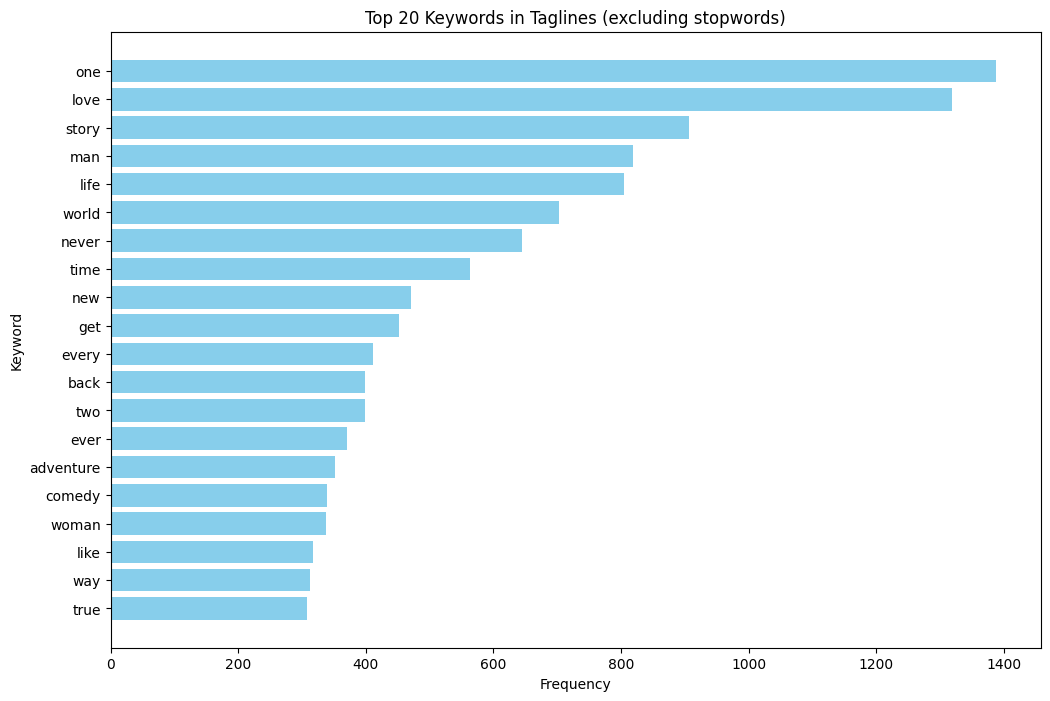

In [185]:
# Optional: Visualize the top 20 keywords using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(top_20_keywords_df['Keyword'], top_20_keywords_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Top 20 Keywords in Taglines (excluding stopwords)')
plt.gca().invert_yaxis()
plt.show()